In [1]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
selected_lamdas = np.logspace(-3,1,10)

In [3]:
net_heat0 = ContTempNetwork.load('agents_SBM_net0_b')
net_heat1 = ContTempNetwork.load('agents_SBM_net1_b')
net_heat2 = ContTempNetwork.load('agents_SBM_net2_c')
net_heat3 = ContTempNetwork.load('agents_SBM_net3_b')

In [4]:
# Example matrices for demonstration
matrix1_0 = net_heat0.compute_static_adjacency_matrix(start_time=0, end_time=150).toarray()
matrix2_0 = net_heat0.compute_static_adjacency_matrix(start_time=150, end_time=300).toarray()

# Example matrices for demonstration
matrix1_1 = net_heat1.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2_1 = net_heat1.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3_1 = net_heat1.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()

# Example matrices for demonstration
matrix1_2 = net_heat2.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2_2 = net_heat2.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3_2 = net_heat2.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()

# Example matrices for demonstration
matrix1_3 = net_heat3.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2_3 = net_heat3.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3_3 = net_heat3.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()

# Define the time intervals for the x-axis
time_intervals_0 = [(0, 150), (150, 300)]
# Define the time intervals for the x-axis
time_intervals_123 = [(0, 100), (100, 200),  (200, 300)]

In [5]:
window = 500

In [6]:
Conditional_S_selected0 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net0_b/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected0.append(S_rate['window_S'][f'{lamda:.11f}'])

# Conditional_S_selected_back0 = []
# for i, lamda in enumerate(selected_lamdas):
#     with open(f'//scratch/tmp/180/skoove/evolving_SBM_heat/net0_b/window_S_selected_back/{window}/window_S{lamda:.11f}', 'rb') as f:
#         S_rate = pickle.load(f)
#         Conditional_S_selected_back0.append(S_rate['window_S'][f'{lamda:.11f}'])

Conditional_S_selected1 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net1_b/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected1.append(S_rate['window_S'][f'{lamda:.11f}'])

# Conditional_S_selected_back1 = []
# for i, lamda in enumerate(selected_lamdas):
#     with open(f'//scratch/tmp/180/skoove/evolving_SBM_heat/net1_b/window_S_selected_back/{window}/window_S{lamda:.11f}', 'rb') as f:
#         S_rate = pickle.load(f)
#         Conditional_S_selected_back1.append(S_rate['window_S'][f'{lamda:.11f}'])

Conditional_S_selected2 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net2_c/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected2.append(S_rate['window_S'][f'{lamda:.11f}'])

# Conditional_S_selected_back2 = []
# for i, lamda in enumerate(selected_lamdas):
#     with open(f'//scratch/tmp/180/skoove/evolving_SBM_heat/net2_b/window_S_selected_back/{window}/window_S{lamda:.11f}', 'rb') as f:
#         S_rate = pickle.load(f)
#         Conditional_S_selected_back2.append(S_rate['window_S'][f'{lamda:.11f}'])

Conditional_S_selected3 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net3_b/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected3.append(S_rate['window_S'][f'{lamda:.11f}'])

# Conditional_S_selected_back3 = []
# for i, lamda in enumerate(selected_lamdas):
#     with open(f'//scratch/tmp/180/skoove/evolving_SBM_heat/net3_b/window_S_selected_back/{window}/window_S{lamda:.11f}', 'rb') as f:
#         S_rate = pickle.load(f)
#         Conditional_S_selected_back3.append(S_rate['window_S'][f'{lamda:.11f}'])

In [7]:
len(list(net_heat0.times)[-window // 2-1: window // 2: -1])

3881

/tmp/ipykernel_2091527/2784659716.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


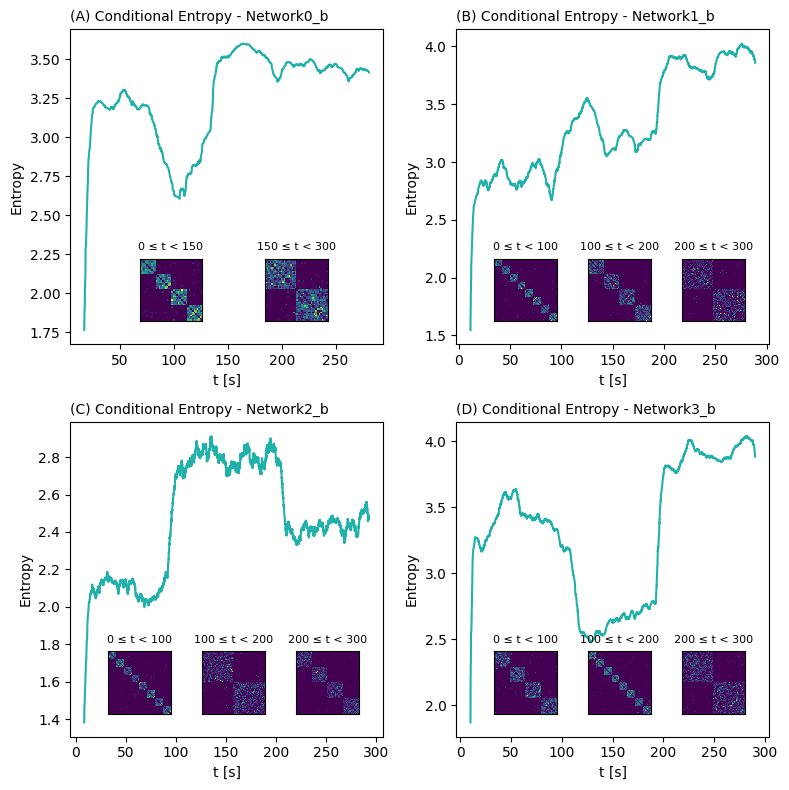

In [8]:
# Start creating the figure
fig = plt.figure(figsize=(8, 8))  # Wider figure for all plots in one row
gs = fig.add_gridspec(2, 2)  # Grid: 1 row, 4 columns

# Column 1: Plot A
ax_a = fig.add_subplot(gs[0, 0])
color_forw = 'lightseagreen'
color_back = 'purple'

index = 6
S = Conditional_S_selected0[index]

ax_a.plot(net_heat0.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(A) Conditional Entropy - Network0_b", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_0, matrix2_0]
positions = [0.20, 0.60]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_0[i][0]} ≤ t < {time_intervals_0[i][1]}", fontsize=8)


# Column 2: Plot B
ax_a = fig.add_subplot(gs[0, 1])

index = 6
S = Conditional_S_selected1[index]

ax_a.plot(net_heat1.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(B) Conditional Entropy - Network1_b", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_1, matrix2_1, matrix3_1]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Column 3: Plot C
ax_a = fig.add_subplot(gs[1, 0])

index = 6
S = Conditional_S_selected2[index]

ax_a.plot(net_heat2.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(C) Conditional Entropy - Network2_b", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_2, matrix2_2, matrix3_2]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Column 4: Plot D
ax_a = fig.add_subplot(gs[1, 1])

index = 6
S = Conditional_S_selected3[index]

ax_a.plot(net_heat3.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(D) Conditional Entropy - Network3_b", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_3, matrix2_3, matrix3_3]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Adjust layout and display
plt.tight_layout()
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_window_fig_b.png', format='png', dpi=300)
plt.show()

In [9]:
# # Start creating the figure
# fig = plt.figure(figsize=(8, 8))  # Wider figure for all plots in one row
# gs = fig.add_gridspec(2, 2)  # Grid: 1 row, 4 columns

# # Column 1: Plot A
# ax_a = fig.add_subplot(gs[0, 0])
# color_forw = 'lightseagreen'
# color_back = 'purple'

# index = 9
# S = Conditional_S_selected0[index]
# S_back = Conditional_S_selected_back0[index]

# ax_a.plot(net_heat0.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
# ax_a.plot(list(net_heat0.times)[-window // 2-1: window // 2: -1], S_back[1:], color=color_back, alpha=1)
# ax_a.set_xlabel("t [s]")
# ax_a.set_ylabel("Entropy")
# ax_a.set_title("(A) Conditional Entropy - Network0_b", loc='left', fontsize=10)

# # Add inset plots for the matrices inside Plot A
# matrices = [matrix1_0, matrix2_0]
# positions = [0.20, 0.60]  # Horizontal positions for the insets
# for i, (matrix, pos) in enumerate(zip(matrices, positions)):
#     inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
#                           bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
#     inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
#     inset_ax.set_xticks([])
#     inset_ax.set_yticks([])
#     inset_ax.set_title(f"{time_intervals_0[i][0]} ≤ t < {time_intervals_0[i][1]}", fontsize=8)


# # Column 2: Plot B
# ax_a = fig.add_subplot(gs[0, 1])

# index = 3
# S = Conditional_S_selected1[index]
# S_back = Conditional_S_selected_back1[index]

# ax_a.plot(net_heat1.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
# ax_a.plot(net_heat1.times[window // 2 + 1: -window // 2], S_back[1:], color=color_back, alpha=1)
# ax_a.set_xlabel("t [s]")
# ax_a.set_ylabel("Entropy")
# ax_a.set_title("(B) Conditional Entropy - Network1_b", loc='left', fontsize=10)

# # Add inset plots for the matrices inside Plot A
# matrices = [matrix1_1, matrix2_1, matrix3_1]
# positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
# for i, (matrix, pos) in enumerate(zip(matrices, positions)):
#     inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
#                           bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
#     inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
#     inset_ax.set_xticks([])
#     inset_ax.set_yticks([])
#     inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# # Column 3: Plot C
# ax_a = fig.add_subplot(gs[1, 0])

# index = 3
# S = Conditional_S_selected2[index]
# S_back = Conditional_S_selected_back2[index]

# ax_a.plot(net_heat2.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
# ax_a.plot(net_heat2.times[window // 2 + 1: -window // 2], S_back[1:], color=color_back, alpha=1)
# ax_a.set_xlabel("t [s]")
# ax_a.set_ylabel("Entropy")
# ax_a.set_title("(C) Conditional Entropy - Network2_b", loc='left', fontsize=10)

# # Add inset plots for the matrices inside Plot A
# matrices = [matrix1_2, matrix2_2, matrix3_2]
# positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
# for i, (matrix, pos) in enumerate(zip(matrices, positions)):
#     inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
#                           bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
#     inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
#     inset_ax.set_xticks([])
#     inset_ax.set_yticks([])
#     inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# # Column 4: Plot D
# ax_a = fig.add_subplot(gs[1, 1])

# index = 3
# S = Conditional_S_selected3[index]
# S_back = Conditional_S_selected_back3[index]

# ax_a.plot(net_heat3.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
# ax_a.plot(net_heat3.times[window // 2 + 1: -window // 2], S_back[1:], color=color_back, alpha=1)
# ax_a.set_xlabel("t [s]")
# ax_a.set_ylabel("Entropy")
# ax_a.set_title("(D) Conditional Entropy - Network3_b", loc='left', fontsize=10)

# # Add inset plots for the matrices inside Plot A
# matrices = [matrix1_3, matrix2_3, matrix3_3]
# positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
# for i, (matrix, pos) in enumerate(zip(matrices, positions)):
#     inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
#                           bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
#     inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
#     inset_ax.set_xticks([])
#     inset_ax.set_yticks([])
#     inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# # Adjust layout and display
# plt.tight_layout()
# #plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_window_fig_b.png', format='png', dpi=300)
# plt.show()

In [10]:
for i in reversed(range(100 - 1, 200)):
    print(i)

for i in range(100 - 1, 200):
    print(i)

199
198
197
196
195
194
193
192
191
190
189
188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


# For Talk

/tmp/ipykernel_2091527/1541199528.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


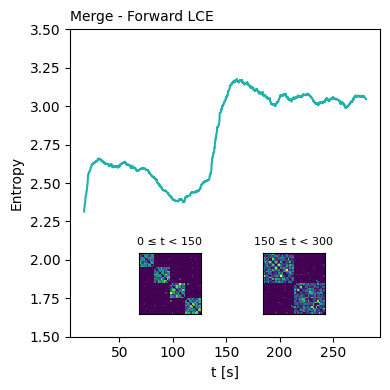

In [11]:
# Column 1: Plot A
fig = plt.figure(figsize=(4, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 1)  # Grid: 1 row, 4 columns

ax_a = fig.add_subplot(gs[0, 0])
index = 4
S = Conditional_S_selected0[index]

ax_a.plot(net_heat0.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)

ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_ylim(1.5, 3.5)
ax_a.set_title("Merge - Forward LCE", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_0, matrix2_0]
positions = [0.20, 0.60]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_0[i][0]} ≤ t < {time_intervals_0[i][1]}", fontsize=8)

plt.tight_layout()
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/merge_LCE_slides.png', format='png', dpi=300)

/tmp/ipykernel_2091527/912709239.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


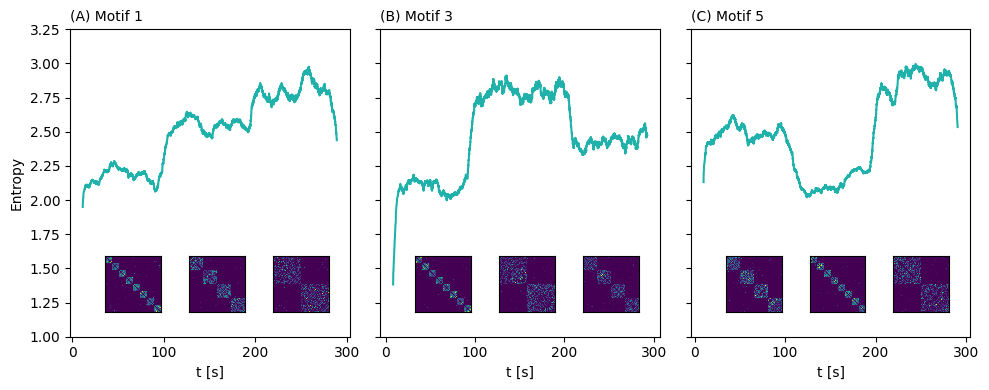

In [12]:
# Start creating the figure
fig = plt.figure(figsize=(10, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 3)  # Grid: 1 row, 4 columns

color_forw = 'lightseagreen'
color_back = 'purple'


# Plot1: Motif1
ax_a = fig.add_subplot(gs[0, 0])

index = 4
S = Conditional_S_selected1[index]


ax_a.plot(net_heat1.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_ylim(1, 3.25)
ax_a.set_title("(A) Motif 1", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_1, matrix2_1, matrix3_1]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Plot2: Motif 3
ax_a = fig.add_subplot(gs[0, 1], sharey=ax_a)
plt.setp(ax_a.get_yticklabels(), visible=False)

index = 6
S = Conditional_S_selected2[index]

ax_a.plot(net_heat2.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_title("(B) Motif 3", loc='left', fontsize=10)
ax_a.set_ylim(1, 3.25)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_2, matrix2_2, matrix3_2]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Plot3: Motif 5
ax_a = fig.add_subplot(gs[0, 2], sharey = ax_a)
plt.setp(ax_a.get_yticklabels(), visible=False)


index = 4
S = Conditional_S_selected3[index]

ax_a.plot(net_heat3.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_title("(C) Motif 5", loc='left', fontsize=10)
ax_a.set_ylim(1, 3.25)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_3, matrix2_3, matrix3_3]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Adjust layout and display
plt.tight_layout()
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/motifs_fig_b_LCE_slides.png', format='png', dpi=300)
plt.show()

### NetSci 2025 version

/tmp/ipykernel_2091527/2001258793.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


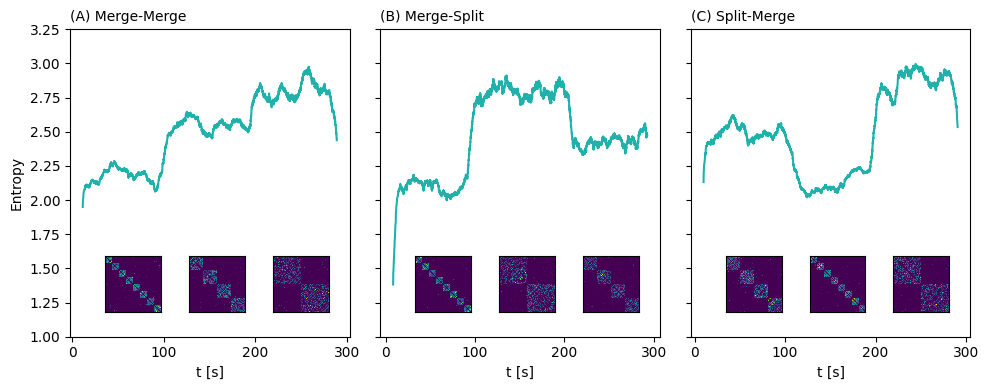

In [13]:
# Start creating the figure
fig = plt.figure(figsize=(10, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 3)  # Grid: 1 row, 4 columns

color_forw = 'lightseagreen'
color_back = 'purple'


# Plot1: Motif1
ax_a = fig.add_subplot(gs[0, 0])

index = 4
S = Conditional_S_selected1[index]


ax_a.plot(net_heat1.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_ylim(1, 3.25)
ax_a.set_title("(A) Merge-Merge", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_1, matrix2_1, matrix3_1]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Plot2: Motif 3
ax_a = fig.add_subplot(gs[0, 1], sharey=ax_a)
plt.setp(ax_a.get_yticklabels(), visible=False)

index = 6
S = Conditional_S_selected2[index]

ax_a.plot(net_heat2.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_title("(B) Merge-Split", loc='left', fontsize=10)
ax_a.set_ylim(1, 3.25)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_2, matrix2_2, matrix3_2]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Plot3: Motif 5
ax_a = fig.add_subplot(gs[0, 2], sharey = ax_a)
plt.setp(ax_a.get_yticklabels(), visible=False)


index = 4
S = Conditional_S_selected3[index]

ax_a.plot(net_heat3.times[window // 2 + 1: -window // 2], S[1:], color=color_forw, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_title("(C) Split-Merge", loc='left', fontsize=10)
ax_a.set_ylim(1, 3.25)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_3, matrix2_3, matrix3_3]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Adjust layout and display
plt.tight_layout()
plt.savefig('/home/b/skoove/Desktop/NetSci2025/motifs_fig_b_LCE_slides.jpg', format='jpg', dpi=300)
plt.show()